In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
from data_reader_writer import data_writer

import pypsa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## System Transformation - 2045

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Biomass (dedicated)       61.446000
Waste                     62.176000
Wave power               113.000000
Small Hydro              230.913108
Large Hydro             1691.699577
CCS Gas                 1810.000000
Hydrogen                1924.474994
Nuclear                 3168.250000
Solar Photovoltaics     3947.294084
Wind Onshore           23890.538179
Wind Offshore          33901.090000
Name: p_nom, dtype: float64


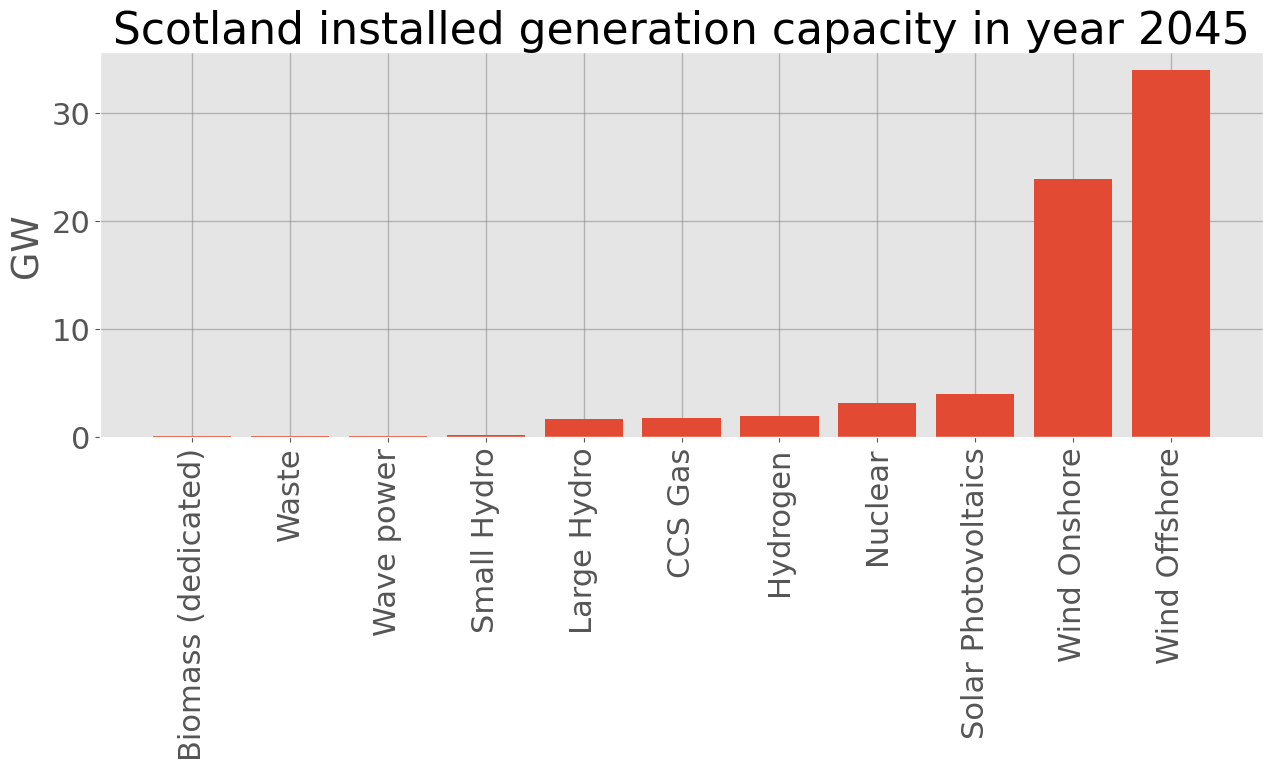

In [3]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2045
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

In [4]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data')
network.lines.s_max_pu

NameError: name 'pypsa' is not defined

## System Transformation - 2040

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Biomass (dedicated)       67.032000
Waste                     71.920000
Wave power               113.000000
Small Hydro              228.092963
Natural Gas              259.600000
Hydrogen                 690.020696
CCS Gas                  910.000000
Large Hydro             1671.038879
Solar Photovoltaics     3009.816731
Nuclear                 3168.250000
Wind Onshore           23325.211626
Wind Offshore          31401.090000
Name: p_nom, dtype: float64


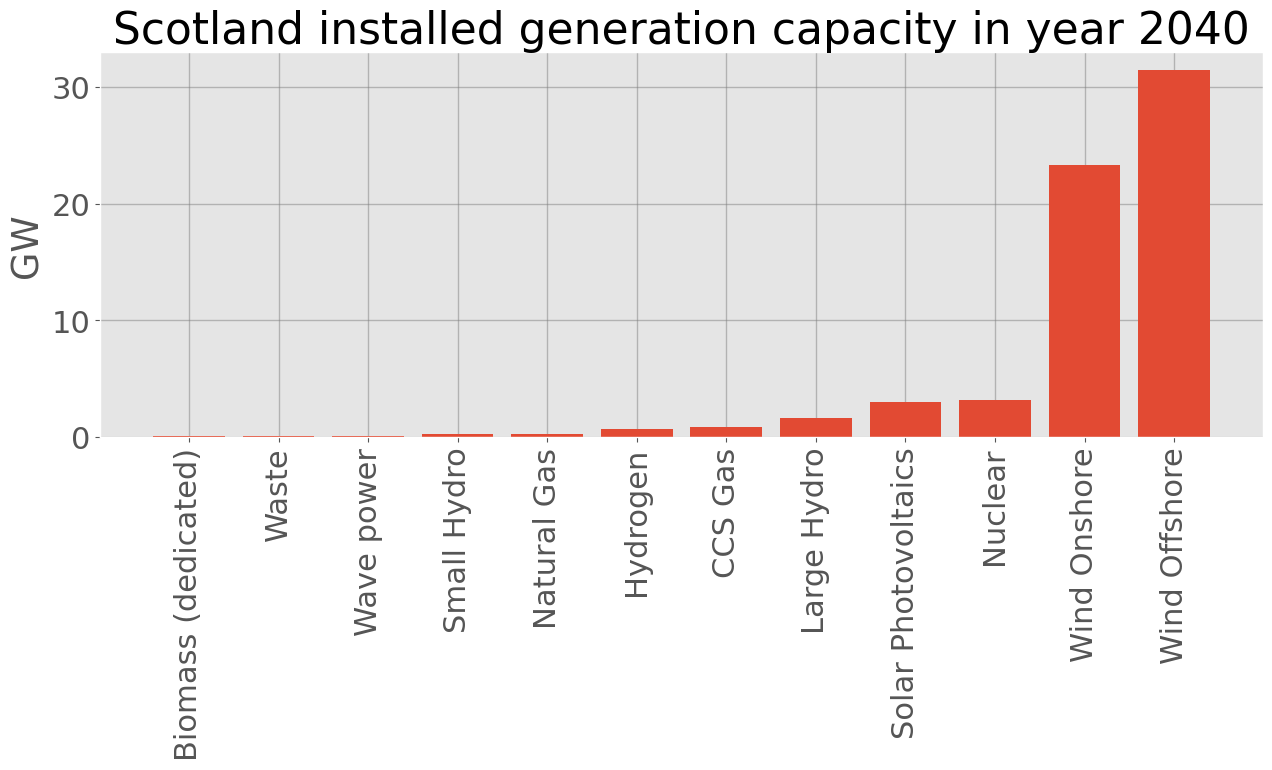

In [ ]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2040
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## System Transformation - 2035

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Biomass (dedicated)       74.480000
Waste                     75.168000
Wave power                88.000000
Small Hydro              225.336082
CCS Gas                  968.584747
Nuclear                 1463.950000
Large Hydro             1650.841597
Solar Photovoltaics     2268.839378
Wind Onshore           22452.637137
Wind Offshore          27031.090000
Name: p_nom, dtype: float64


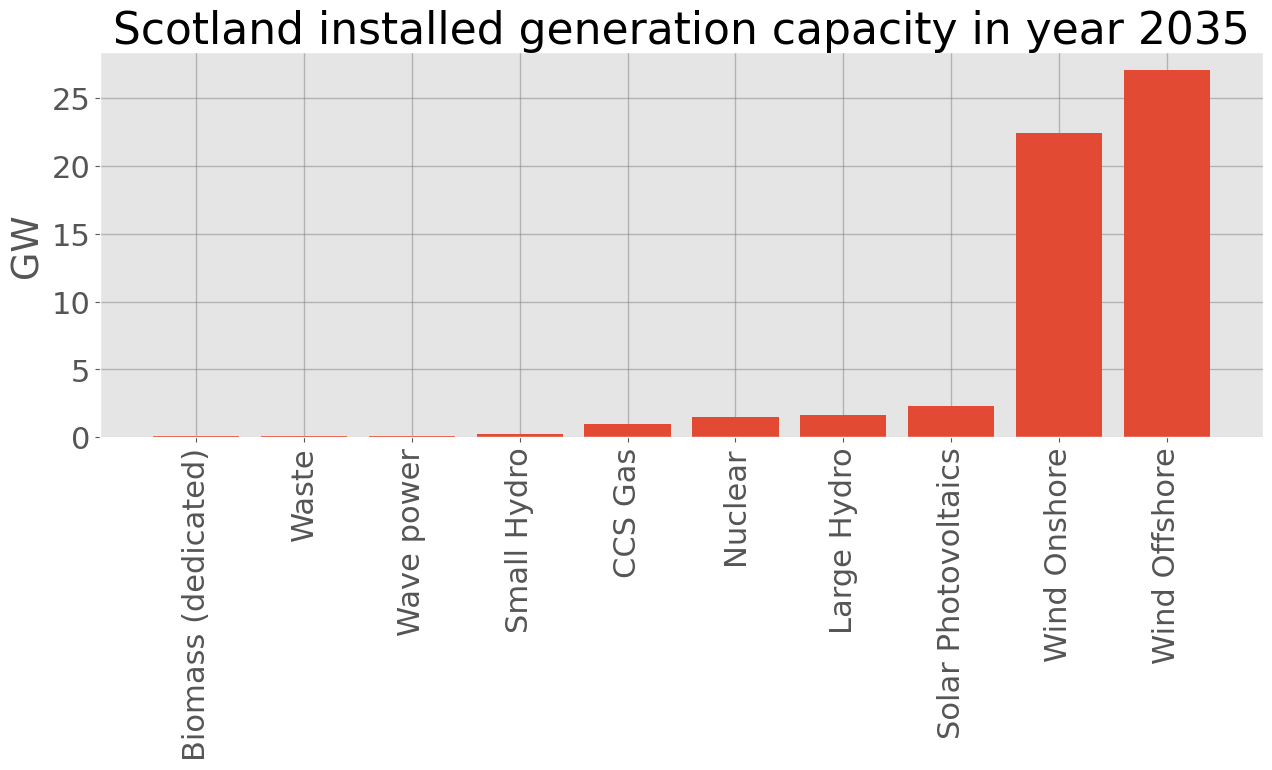

In [ ]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2035
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## System Transformation - 2030

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Oil                       55.200000
Waste                     82.128000
Biomass (dedicated)      167.580000
Small Hydro              222.628043
CCS Gas                  968.584707
Solar Photovoltaics     1400.126320
Large Hydro             1631.002146
Wind Offshore           5136.090000
Wind Onshore           18978.428676
Name: p_nom, dtype: float64


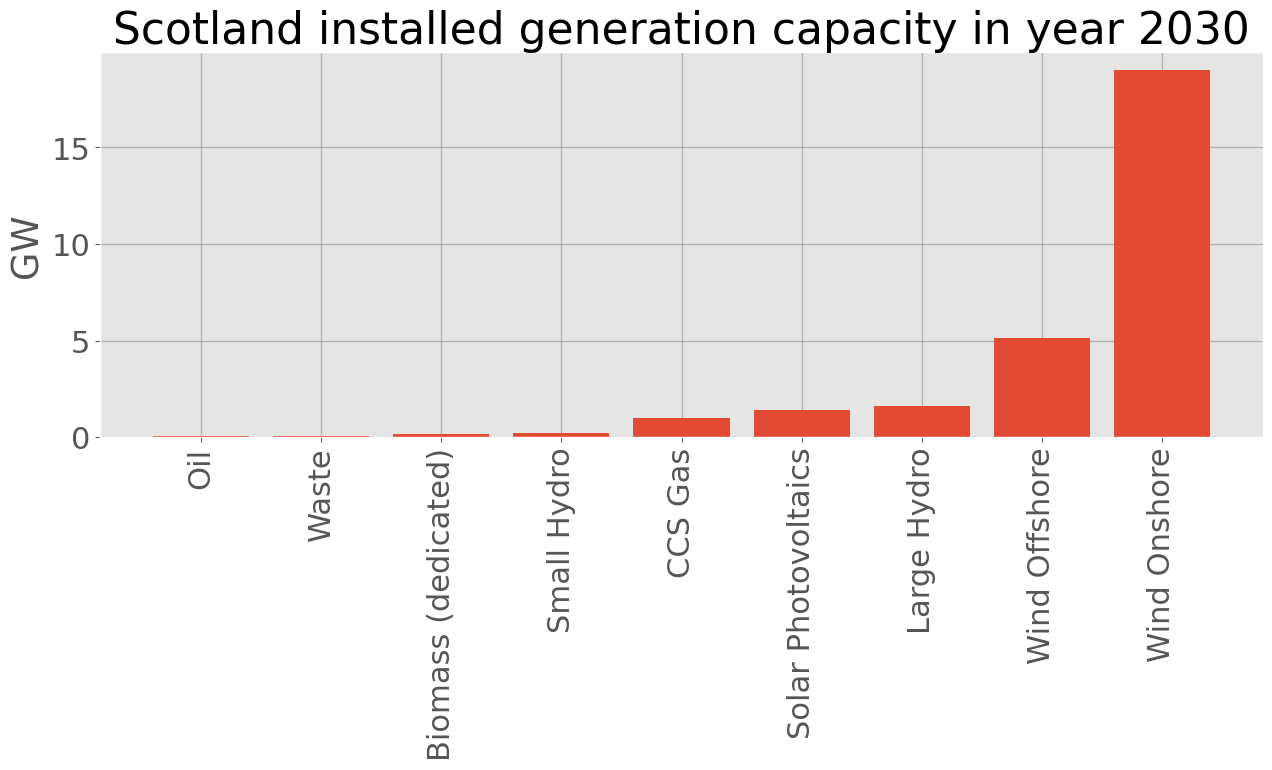

In [ ]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2030
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## System Transformation - 2021

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


carrier
Waste                    57.536000
Biomass (dedicated)     182.476000
Oil                     197.340000
Small Hydro             217.124238
Solar Photovoltaics     462.292021
Natural Gas            1038.400000
Large Hydro            1590.680533
Wind Offshore          1663.100000
Nuclear                1750.000000
Wind Onshore           8928.762348
Name: p_nom, dtype: float64


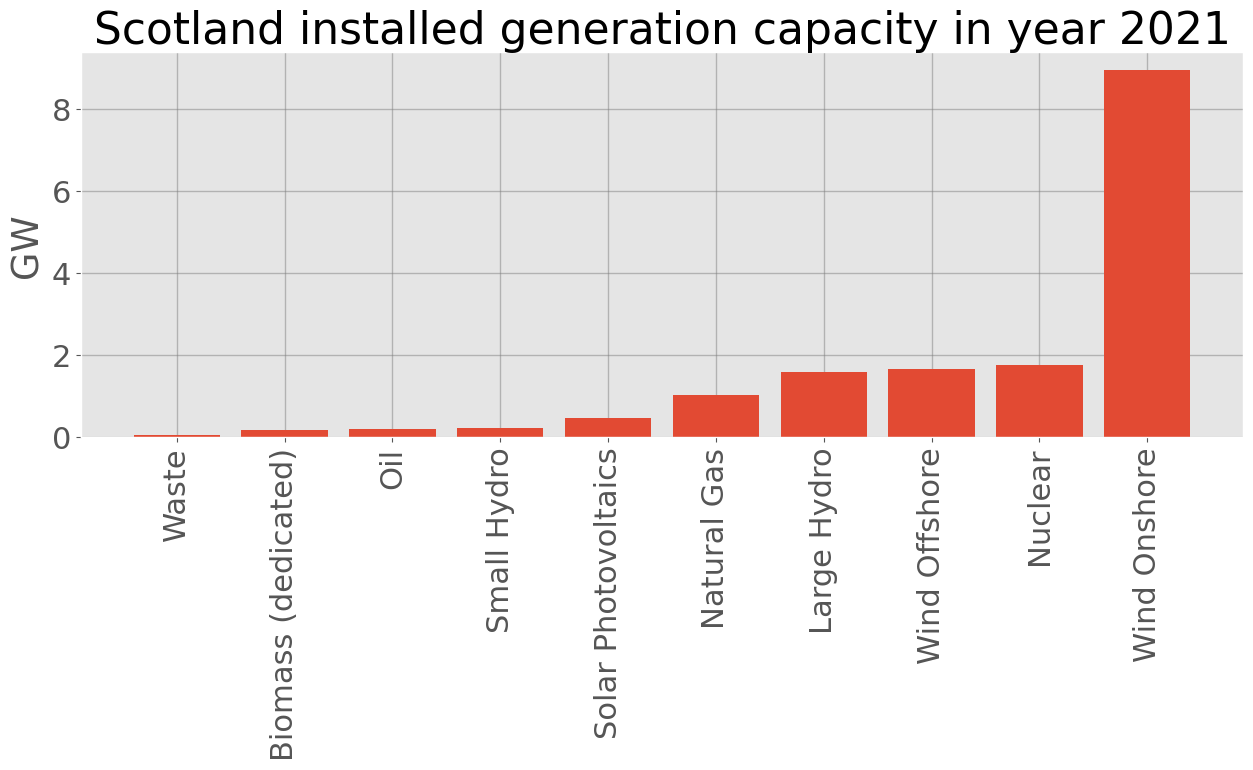

In [ ]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2021
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()